In [12]:
pip install ucimlrepo

In [13]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [10]:
X = bank_marketing.data.features
y = bank_marketing.data.targets
X.info(), X.describe(), X.head(), y.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


(None,
                 age        balance   day_of_week      duration      campaign  \
 count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
 mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
 std       10.618762    3044.765829      8.322476    257.527812      3.098021   
 min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
 25%       33.000000      72.000000      8.000000    103.000000      1.000000   
 50%       39.000000     448.000000     16.000000    180.000000      2.000000   
 75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
 max       95.000000  102127.000000     31.000000   4918.000000     63.000000   
 
               pdays      previous  
 count  45211.000000  45211.000000  
 mean      40.197828      0.580323  
 std      100.128746      2.303441  
 min       -1.000000      0.000000  
 25%       -1.000000      0.000000  
 50%       -1.000000      0.000000  
 75

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


(None,
                 age        balance   day_of_week      duration      campaign  \
 count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
 mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
 std       10.618762    3044.765829      8.322476    257.527812      3.098021   
 min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
 25%       33.000000      72.000000      8.000000    103.000000      1.000000   
 50%       39.000000     448.000000     16.000000    180.000000      2.000000   
 75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
 max       95.000000  102127.000000     31.000000   4918.000000     63.000000   
 
               pdays      previous  
 count  45211.000000  45211.000000  
 mean      40.197828      0.580323  
 std      100.128746      2.303441  
 min       -1.000000      0.000000  
 25%       -1.000000      0.000000  
 50%       -1.000000      0.000000  
 75

<Axes: xlabel='job', ylabel='count'>

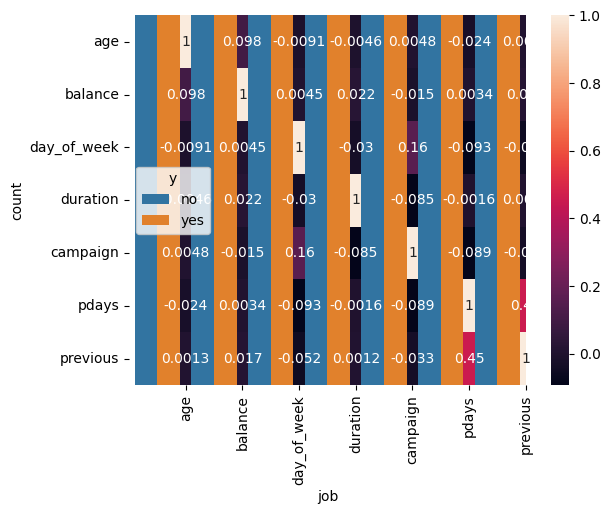

In [22]:
import seaborn as sns

numeric_X = X.select_dtypes(include=['number'])

sns.histplot(X['age'], bins=20, kde=True)
sns.heatmap(numeric_X.corr(), annot=True)
sns.countplot(x='job', hue=y.squeeze(), data=X.join(y))

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [17]:
# Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.65      0.40      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043

[[7760  225]
 [ 639  419]]
ROC-AUC: 0.926285639543899


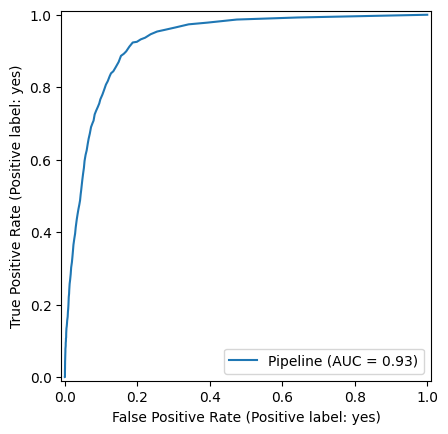

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_proba = model_rf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
RocCurveDisplay.from_estimator(model_rf, X_test, y_test)
plt.show()